In [1]:
import numpy as np
import scipy as sp

from scipy.stats import norm
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt


#############################################
run_additional = True # just additional plots
#############################################

### Task 1. Probability

#### A) Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $\mathcal{N}(x; 1; 1)$.
Hint: you might want to look at the library $scipy.stats$ and use the function $norm.pdf()$.

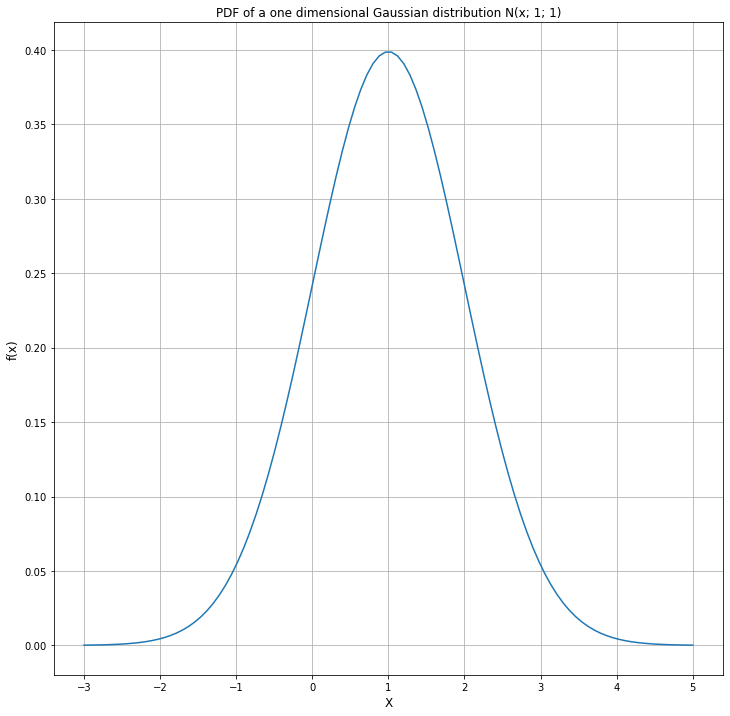

In [2]:
x = np.linspace(-3, 5, 100)
mu = 1
sigma = 1

plt.figure(figsize=(12,12))
plt.plot(x, norm.pdf(x, mu, sigma))
plt.grid()
plt.title('PDF of a one dimensional Gaussian distribution N(x; 1; 1)')
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.show()

#### B) Calculate the probability mass that the random variable $X$ is less than $0$, that is, $Pr\{X \leq 0\} = \int_{-\infty}^{0} p(x)dx$
Hint: you might want to use the function $norm.cdf()$.

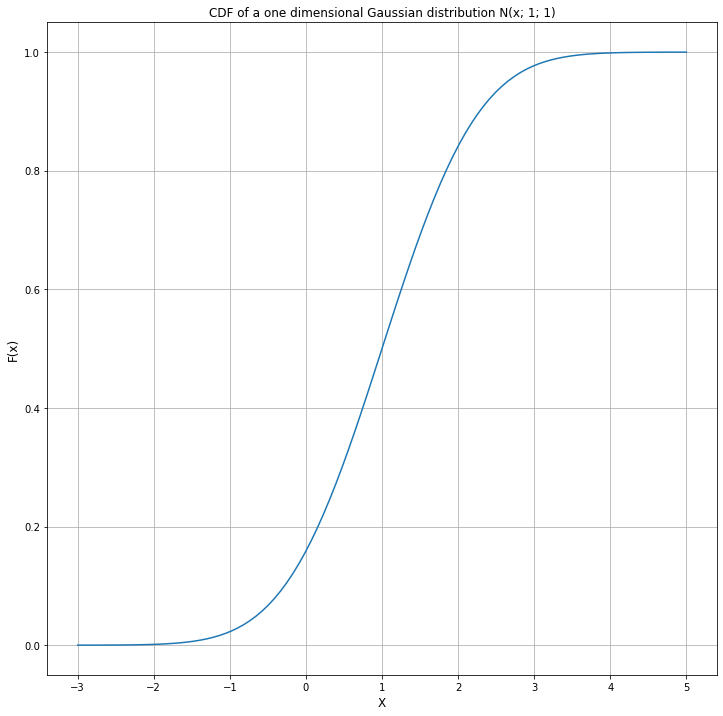

In [3]:
if run_additional:
    plt.figure(figsize=(12,12))
    plt.plot(x, norm.cdf(x, mu, sigma))
    plt.grid()
    plt.title('CDF of a one dimensional Gaussian distribution N(x; 1; 1)')
    plt.xlabel('X', fontsize=12)
    plt.ylabel('F(x)', fontsize=12)
    plt.show()

In [4]:
print(f'Probability mass = {norm.cdf(0, mu, sigma)}')

Probability mass = 0.15865525393145707


#### C) Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood function $p(z|x) = \mathcal{N}(z; x, \sigma^2)$, with variance $\sigma^2 = 0.2$. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.



$p(x|z) = \frac{p(z|x) p(x)}{p(z)} = \frac{p(z, x)}{p(z)} $

$
p(z|x)p(x) = 
\frac{1}{\sqrt{2 \pi \sigma^2_{z|x}}} exp(-\frac{1}{2\sigma^2_{z|x}} (z-\mu_{z|x})^2)\frac{1}{\sqrt{2 \pi \sigma^2_{x}}} exp(-\frac{1}{2\sigma^2_{x}} (x-\mu_x)^2) 
= 
\frac{1}{\sqrt{2 \pi \sigma^2_{z|x}}}\frac{1}{\sqrt{2 \pi \sigma^2_{x}}}exp(-\frac{1}{2}(\frac{1}{\sigma^2_{z|x}} (z-\mu_{z|x})^2+\frac{1}{\sigma^2_{x}} (x-\mu_x)^2))
$

From the other side 
$
p(z|x)p(x) = p(z, x) = \alpha \ exp(-\frac{1}{2}
\begin{bmatrix}
z - \mu_z \\
x - \mu_x
\end{bmatrix}^T
\Sigma^{-1}
\begin{bmatrix}
z - \mu_z \\
x - \mu_x
\end{bmatrix}
)
$
where 
$
\Sigma = 
\begin{bmatrix}
\Sigma_z & \Sigma_{zx} \\
\Sigma_{xz} & \Sigma_x
\end{bmatrix}
$

Now rewrite exponent, let $\Lambda = \Sigma^{-1}$:
$
\begin{bmatrix}
z - \mu_z \\
x - \mu_x
\end{bmatrix}^T
\Lambda
\begin{bmatrix}
z - \mu_z \\
x - \mu_x
\end{bmatrix}
=
\begin{bmatrix}
(z - \mu_z)\Lambda_z + (x - \mu_x)\Lambda_{xz} & (z - \mu_z)\Lambda_{zx} + (x - \mu_x)\Lambda_{x}
\end{bmatrix}
\begin{bmatrix}
z - \mu_z \\
x - \mu_x
\end{bmatrix}
=
((z - \mu_z)\Lambda_z + (x - \mu_x)\Lambda_{xz})(z - \mu_z) + ((z - \mu_z)\Lambda_{zx} + (x - \mu_x)\Lambda_{x})(x - \mu_x)
=...
$

As $x$ and $z$ are single variables then $\Lambda_z, \Lambda_{xz}, \Lambda_{zx}, \Lambda_x$ are scalars and $\Lambda_{xz} = \Lambda_{zx}^T = \Lambda_{zx}$, so:

$
...=\Lambda_z(z - \mu_z)^2 + \Lambda_{xz}(x - \mu_x)(z - \mu_z) + \Lambda_{xz}(z - \mu_z)(x - \mu_x) + \Lambda_x(x - \mu_x)^2
=
\Lambda_z(z - \mu_z)^2 + 2\Lambda_{xz}(x - \mu_x)(z - \mu_z) + \Lambda_x(x - \mu_x)^2
$

And finally, as $p(z|x)p(x) = p(z, x)$ then:

$
-\frac{1}{2}(\frac{1}{\sigma^2_{z|x}} (z-\mu_{z|x})^2+\frac{1}{\sigma^2_{x}} (x-\mu_x)^2) 
=
-\frac{1}{2}(\Lambda_z(z - \mu_z)^2 + 2\Lambda_{zx}(x - \mu_x)(z - \mu_z) + \Lambda_x(x - \mu_x)^2)
$

$
\frac{1}{\sigma^2_{z|x}} (z-\mu_{z|x})^2+\frac{1}{\sigma^2_{x}} (x-\mu_x)^2 
=
\Lambda_z(z - \mu_z)^2 + 2\Lambda_{zx}(x - \mu_x)(z - \mu_z) + \Lambda_x(x - \mu_x)^2
$


$
5(z-x)^2 + (x-1)^2 
=
\Lambda_z(z - \mu_z)^2 + 2\Lambda_{xz}(x - 1)(z - \mu_z) + \Lambda_x(x - 1)^2
$

$
5(z^2 - 2zx + x^2) + (x^2 - 2x + 1) 
=
\Lambda_z(z^2 - 2z\mu_z + \mu_z^2) + 2\Lambda_{xz}(xz - 2x\mu_z - 2z + \mu_z) + \Lambda_x(x^2 - 2x + 1)
$

$
5z^2 - 10zx + 5x^2  + x^2 - 2x + 1
=
\Lambda_z z^2 - 2\Lambda_z z\mu_z + \Lambda_z \mu_z^2 + 2xz\Lambda_{xz} - 2x\Lambda_{xz}\mu_z - 2z\Lambda_{xz} + 2\Lambda_{xz}\mu_z + \Lambda_x x^2 - 2\Lambda_x x + \Lambda_x
$

$
5z^2 + 6x^2 - 10zx - 2x + 1
=
\Lambda_z z^2 + x^2\Lambda_x + 2zx\Lambda_{xz}  - 2x(\Lambda_{xz}\mu_z + \Lambda_x) - 2z(\Lambda_{xz} + \Lambda_{z}\mu_z) + (2\Lambda_{xz}\mu_z + \Lambda_x + \Lambda_z\mu_z^2)
$

$
\begin{cases}
5 = \Lambda_z \\
6 = \Lambda_x \\
-10 = 2\Lambda_{xz} \\
-2 = -2(\Lambda_{xz}\mu_z + \Lambda_x) \\
0 = -2(\Lambda_{xz} + \Lambda_{z}\mu_z) \\
1 = (2\Lambda_{xz}\mu_z + \Lambda_x + \Lambda_z\mu_z^2) 
\end{cases}
\Rightarrow
\begin{cases}
\Lambda_z = 5 \\
\Lambda_x = 6 \\
\Lambda_{xz} = -5 \\
\mu_z = 1
\end{cases}
\Rightarrow
\Lambda = 
\begin{bmatrix}
5 & -5 \\
-5 & 6
\end{bmatrix}
$

Using Schur compliment we can obtain $\Sigma$:

$
\Sigma_z = M = (\Lambda_z - \Lambda_{zx}\Lambda_x^{-1}\Lambda_{xz})^{-1} =(5 - (-5)*\frac{1}{6}(-5))^{-1} = (\frac{5}{6})^{-1} = 1.2 
$

$
\Sigma_{zx} = \Sigma_{xz} = -M\Lambda_{zx}\Lambda_x^{-1} =-\frac{6}{5} (-5) \frac{1}{6} = 1
$

$\Sigma_{x} = 1$ from $\mathcal{N}(x; 1; 1)$

$
\Sigma =
\begin{bmatrix}
1.2 & 1 \\
1 & 1
\end{bmatrix}
$

And now we can marginilize $z$ and define $p(z) \sim \mathcal{N}(1, 1.2)$

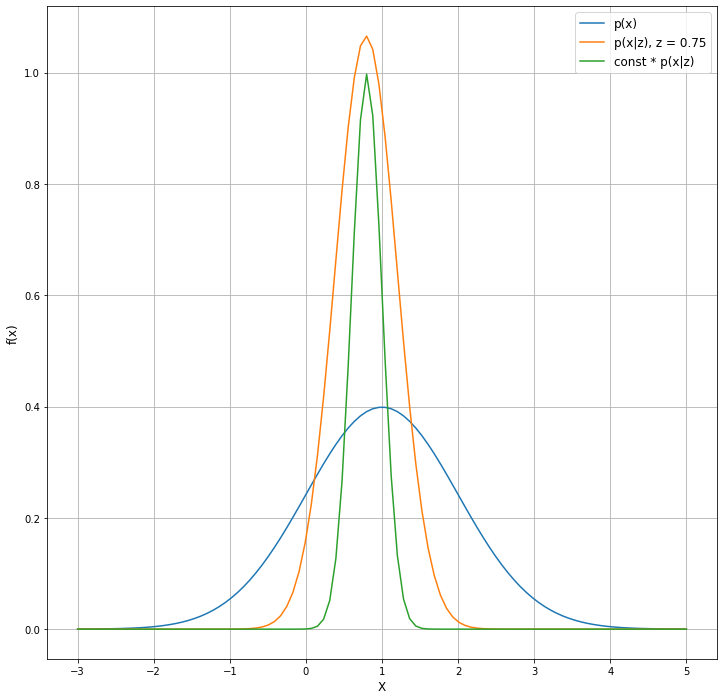

In [5]:
z = np.array([0.75] * x.shape[0])

mu_z_x = np.array([1, 1]) 
sigma_z_x = np.array([
    [1.2, 1],
    [1,   1]
])

p_z_75 = norm.pdf(0.75, mu_z_x[0], sigma_z_x[0, 0])

##additional
if run_additional:
    p_x_z = norm.pdf(x, 0.8, 0.2)

plt.figure(figsize=(12,12))
plt.plot(x, norm.pdf(x, mu, sigma), label='p(x)')
plt.plot(x, multivariate_normal.pdf(np.dstack((z, x)), mu_z_x, sigma_z_x)/p_z_75, label='p(x|z), z = 0.75')
if run_additional:
    plt.plot(x, 0.5 * norm.pdf(x, 0.8, 0.2), label='const * p(x|z)')
plt.grid()
plt.legend(fontsize=12)
plt.xlabel('X', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.show()


#### D) Plot the joint probability density function $p(x, z)$

As $p(x, z) = p(z, x)$ we can just use obtained matrix from 1.C

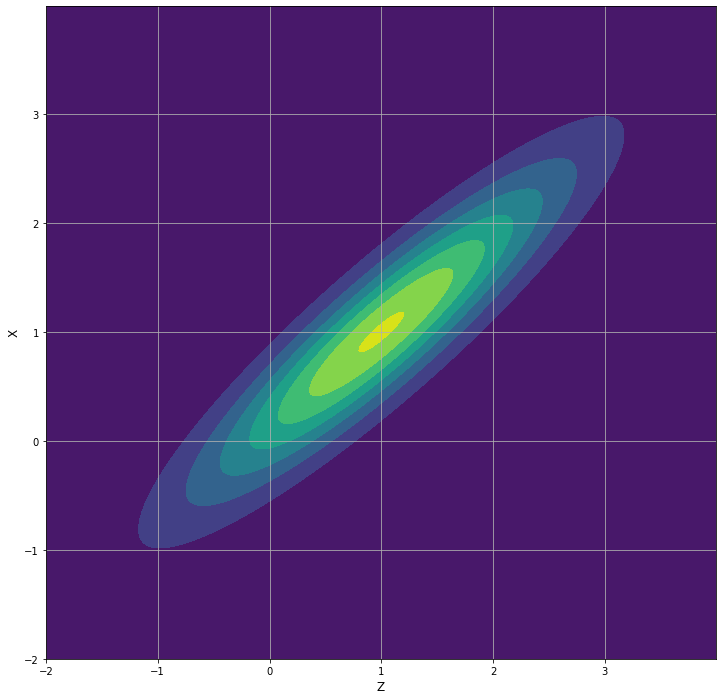

In [6]:
z, x = np.mgrid[-2:4:.01, -2:4:.01]
pos = np.dstack((z, x))

plt.figure(figsize=(12,12))
plt.contourf(z, x, multivariate_normal.pdf(pos, mu_z_x, sigma_z_x)) #it's plot only 2-sigma contour
plt.grid()
plt.xlabel('Z', fontsize=12)
plt.ylabel('X', fontsize=12)
plt.show()

### Task 2. Multivariate Gaussian

#### A) Write the function ``plot2dcov`` which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value $k$. You may add any other parameter such as color, number of points, etc.
Hint: Make use of the Cholesky decomposition ``scipy.linalg.cholesky`` or SVD and project a circumference
with radius $k$, as explained in class. Use, for instance, 30 points.
Hint: the Cholesky decomposition routine, could solve for the upper triangular matrix, $A^T A = \Sigma$ which is
not what you may want. Read the function help and make sure the decomposition maps back to the original
covariance in the form $A A^T = \Sigma$

In [7]:
def plot2dcov(mu, sigma, k, points_num=30, show=False, title=''):

    x = []
    y = []
    #compute Cholesky
    A = sp.linalg.cholesky(sigma, lower=True)

    angles = np.linspace(0, 360, points_num + 1)
    for angle in angles:
        point = np.array([k * np.cos(angle * np.pi / 180), k * np.sin(angle * np.pi / 180)])
        new_point = mu + A @ point
        x.append(new_point[0])
        y.append(new_point[1])

    #fig, ax = plt.subplots()
    plt.plot(x, y, label=f'{k}-sigma iso-contour {title}')
    plt.plot(mu[0], mu[1], 'o', markersize=4, color=plt.gca().lines[-1].get_color())
    #ax.axes.set_aspect('equal')


    if show:
        plt.legend(fontsize=12)
        plt.xlabel('X', fontsize=12)
        plt.ylabel('Y', fontsize=12)
        plt.axis('equal')
        plt.grid()
        plt.show()



## test from lecture
# mu = np.array([0, 0])
# sigma = np.array([[4, -2],
#                   [-2, 10]])
#
# plot2dcov(mu, sigma, 1)
# plot2dcov(mu, sigma, 2)
# plot2dcov(mu, sigma, 3)

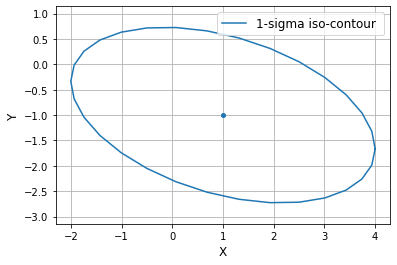

In [8]:
mu = np.array([1, -1])
sigma = np.array([[9, -2],
                    [-2, 3]])
plot2dcov(mu, sigma, 1, show=True)

In [12]:
def plot2dcov2(mu, Sigma, color='k', nSigma=1, legend=None):
    """
    Plots a 2D covariance ellipse given the Gaussian distribution parameters.
    The function expects the mean and covariance matrix to ignore the theta parameter.

    :param mu: The mean of the distribution: 2x1 vector.
    :param Sigma: The covariance of the distribution: 2x2 matrix.
    :param color: The border color of the ellipse and of the major and minor axes.
    :param nSigma: The radius of the ellipse in terms of the number of standard deviations (default: 1).
    :param legend: If not None, a legend label to the ellipse will be added to the plot as an attribute.
    """
    mu = np.array(mu)
    assert mu.shape == (2,)
    Sigma = np.array(Sigma)
    assert Sigma.shape == (2, 2)

    n_points = 50

    A = sp.linalg.cholesky(Sigma, lower=True)

    angles = np.linspace(0, 2 * np.pi, n_points)
    x_old = nSigma * np.cos(angles)
    y_old = nSigma * np.sin(angles)

    x_y_old = np.stack((x_old, y_old), 1)
    x_y_new = np.matmul(x_y_old, np.transpose(A)) + mu.reshape(1, 2) # (A*x)T = xT * AT

    plt.plot(x_y_new[:, 0], x_y_new[:, 1], color=color, label=legend)
    plt.scatter(mu[0], mu[1], color=color)

In [13]:
# check contours for task 1.D
if run_additional:
    plt.figure(figsize=(12,12))
    plt.contourf(z, x, multivariate_normal.pdf(pos, mu_z_x, sigma_z_x))
    plot2dcov(mu_z_x, sigma_z_x, 1)
    plot2dcov(mu_z_x, sigma_z_x, 2)
    plot2dcov(mu_z_x, sigma_z_x, 3, show=True)

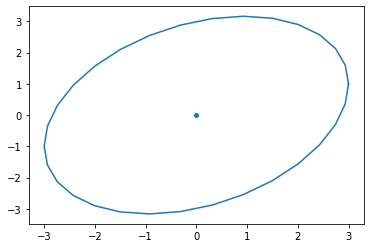

In [8]:
mu = np.array([0, 0])
sigma = np.array([[9, 3],
                    [3, 10]])
plot2dcov(mu, sigma, 1)

In [14]:
if run_additional:
    mu = np.array([0, 0])
    sigma = np.array([[1, 0],
                      [0, 1]])
    plt.figure(figsize=(12,12))
    plot2dcov(mu, sigma, 1)
    plot2dcov(mu, sigma, 2)
    plot2dcov(mu, sigma, 3, show=True)

Then, use ``plot2dcov`` to draw the iso-contours corresponding to $1,2,3-sigma$ of the following Gaussian distributions:

$\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
1 & 0 \\
0 & 2
\end{bmatrix}
\end{pmatrix}
$

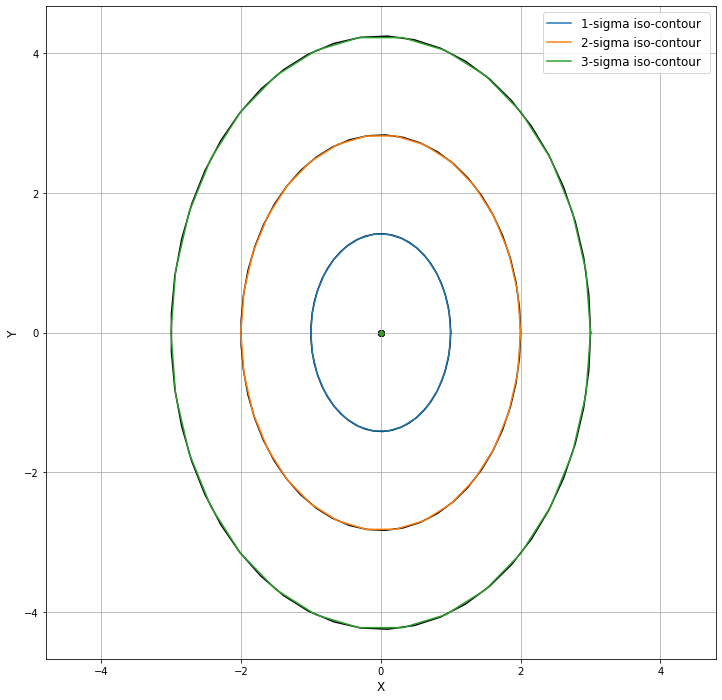

In [15]:
mu = np.array([0, 0])
sigma = np.array([[1, 0],
                  [0, 2]])

plt.figure(figsize=(12,12))
plot2dcov2(mu, sigma, nSigma=1)
plot2dcov2(mu, sigma, nSigma=2)
plot2dcov2(mu, sigma, nSigma=3)
plot2dcov(mu, sigma, 1)
plot2dcov(mu, sigma, 2)
plot2dcov(mu, sigma, 3, show=True)

$\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
5 \\
0
\end{bmatrix},
\begin{bmatrix}
3 & -0.4 \\
-0.4 & 2
\end{bmatrix}
\end{pmatrix}
$

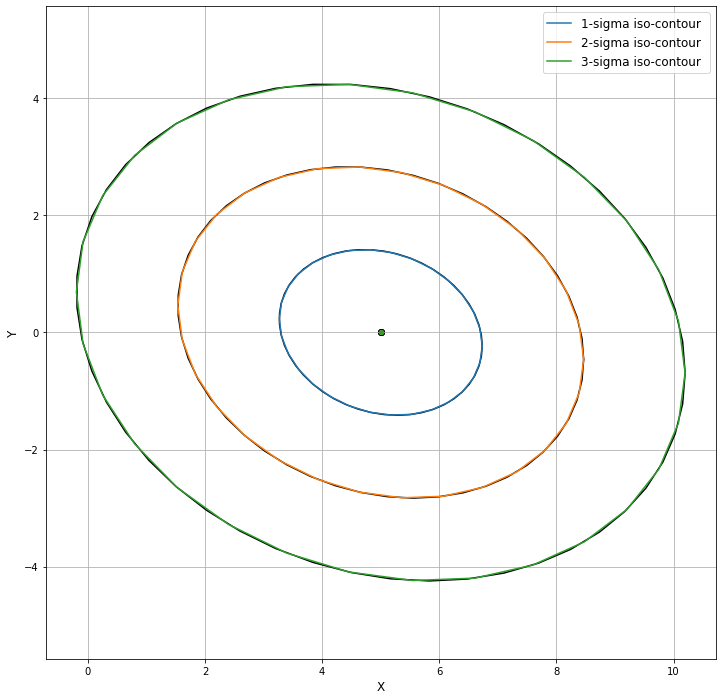

In [16]:
mu = np.array([5, 0])
sigma = np.array([[3, -0.4],
                  [-0.4, 2]])

plt.figure(figsize=(12,12))
plot2dcov2(mu, sigma, nSigma=1)
plot2dcov2(mu, sigma, nSigma=2)
plot2dcov2(mu, sigma, nSigma=3)
plot2dcov(mu, sigma, 1)
plot2dcov(mu, sigma, 2)
plot2dcov(mu, sigma, 3, show=True)

$\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
2 \\
2
\end{bmatrix},
\begin{bmatrix}
9.1 & 6 \\
6 & 4
\end{bmatrix}
\end{pmatrix}
$

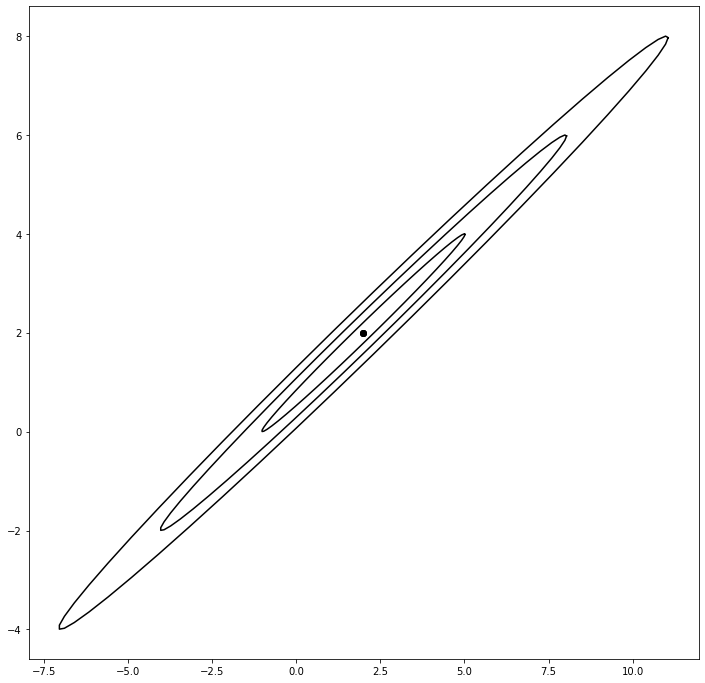

In [18]:
mu = np.array([2, 2])
sigma = np.array([[9.1, 6],
                  [6, 4]])

plt.figure(figsize=(12,12))
plot2dcov2(mu, sigma, nSigma=1)
plot2dcov2(mu, sigma, nSigma=2)
plot2dcov2(mu, sigma, nSigma=3)
# plot2dcov(mu, sigma, 1)
# plot2dcov(mu, sigma, 2)
# plot2dcov(mu, sigma, 3, show=True)

#### B) Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form. You can provide your solution by using Markdown, latex, by hand, etc.

Sample mean: $\bar{x} = \frac{1}{N} \sum_{i=1}^N{x_i}$

Sample covariance: $\frac{1}{N - 1} \sum_{i=1}^N{(x_i - \bar{x})(x_i - \bar{x})^T}$

where $x_i, \bar{x}$ are column vectors

#### C)Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution $\mathcal{N}(0, 1)$.
In particular, draw and plot $200$ samples from
$\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
2 \\
2
\end{bmatrix},
\begin{bmatrix}
1 & 1.3 \\
1.3 & 3
\end{bmatrix}
\end{pmatrix}
$; also plot their corresponding $1-sigma$ iso-contour. Then, using the results from
$B$, calculate the sample mean and covariance and plot again the 1-sigma iso-contour for the estimated
Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on
the results.

Number of samples: 200
(2, 200)
obtained mean:
 [2.01979318 2.12979316]
obtained covariance:
 [[0.82815943 1.14694929]
 [1.14694929 3.01498884]]
Number of samples: 500
(2, 500)
obtained mean:
 [2.05226259 2.05900413]
obtained covariance:
 [[1.00315225 1.289858  ]
 [1.289858   2.9699082 ]]


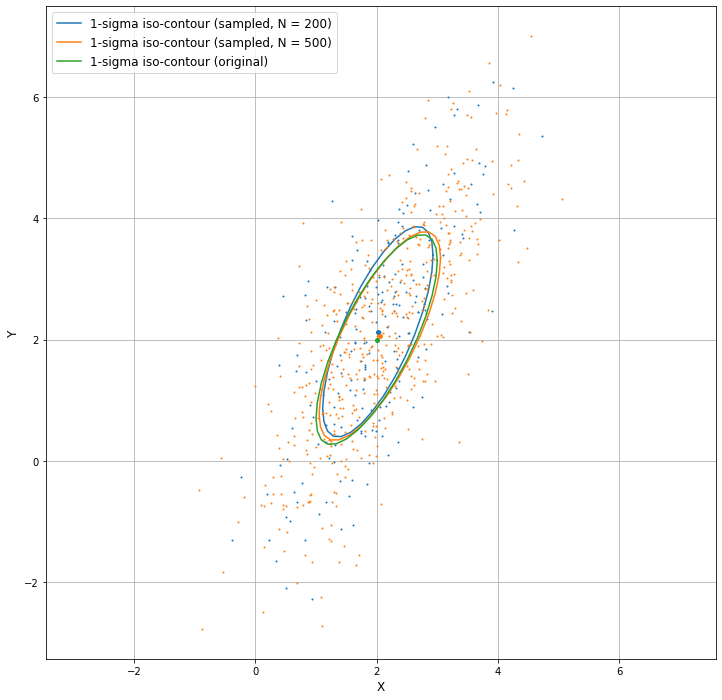

In [13]:
N = [200, 500]#[200, 500, 2000]

mu = np.array([2, 2])
sigma = np.array([[1, 1.3],
                  [1.3, 3]])

plt.figure(figsize=(12,12))

for n in N:
    print(f'Number of samples: {n}')
    sample = np.random.multivariate_normal(mu, sigma, n).T
    print(sample.shape)


    sample_mean = np.sum(sample, axis=1) / n

    # As subtract in numpy applied to rows, then
    _x = sample - np.tile(sample_mean, np.array(sample.shape) // np.array(sample_mean.shape))
    sample_covariance = (_x) @ (_x).T / (n - 1)

    print(f'obtained mean:\n {sample_mean}')
    print(f'obtained covariance:\n {sample_covariance}')

    plot2dcov(sample_mean, sample_covariance, 1, title=f'(sampled, N = {n})')
    plt.plot(sample[0], sample[1], 'o', color=plt.gca().lines[-1].get_color(), markersize=1)

plot2dcov(mu, sigma, 1, title='(original)', show=True)

##### Comment

Obtained mean and covariance close to the original one. We can see very similar iso-continuous, but their boundaries are
a slightly different because we don't have enough points to estimate initial distribution. As the number of samples increased, the mean and covariance became closer

### Task 3: Covariance Propagation

For this task, we will model an omni-directional robotic platform, i.e., a holonomic platform moving as a free
point without restrictions.

The propagation model is the following:
$
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
+
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
$
, where the controls $u = [ v_x  v_y]^{T}
$
are the velocities which are commanded to the robot. Unfortunately, there exists some uncertainty
on command execution
$
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
\sim
\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
0.1 & 0\\
0   & 0.1
\end{bmatrix}
\end{pmatrix}
$
. We will consider a time step of $\Delta t = 0.5$.

#### A) Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform. How can we use this result iteratively?

1)$
\mu_t = E
\begin{Bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t}
\end{Bmatrix}
=
E
\begin{Bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
+
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
\end{Bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
E
\begin{Bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
\end{Bmatrix}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
E
\begin{Bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
\end{Bmatrix}
+
E
\begin{Bmatrix}
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
\end{Bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\} \\
E\{y\}
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
+
\begin{bmatrix}
0 \\
0
\end{bmatrix}_{t}
$

as $\Delta t, v_x, v_y = const$ and $
E\{\eta\} = 
\begin{bmatrix}
0 \\
0
\end{bmatrix}
$.


2)$
\Sigma_{t} = E
\begin{Bmatrix}
\begin{pmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t} - \mu_t
\end{pmatrix}
\begin{pmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t} - \mu_t
\end{pmatrix}^T
\end{Bmatrix}
=
E
\begin{Bmatrix}
\begin{pmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
+
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\} \\
E\{y\}
\end{bmatrix}_{t-1}
-
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
\end{pmatrix}
\times
\begin{pmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
+
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\} \\
E\{y\}
\end{bmatrix}_{t-1}
-
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
\end{pmatrix}^T
\end{Bmatrix}
=
E
\begin{Bmatrix}
\begin{pmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\} \\
E\{y\}
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
\end{pmatrix}
\times
\begin{pmatrix}
\begin{bmatrix}
x & y
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
-
\begin{bmatrix}
E\{x\} & E\{y\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
\eta_x & \eta_y
\end{bmatrix}_{t}
\end{pmatrix}
\end{Bmatrix}
=
E
\begin{Bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x^2 & xy\\
yx  & y^2
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
xE\{x\} & xE\{y\}\\
yE\{x\} & yE\{y\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x\eta_x & x\eta_y\\
y\eta_x & y\eta_y
\end{bmatrix}_{t}
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}x & E\{x\}y\\
E\{y\}x & E\{y\}y
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}E\{x\} & E\{x\}E\{y\}\\
E\{y\}E\{x\} & E\{y\}E\{y\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}\eta_x & E\{x\}\eta_y\\
E\{y\}\eta_x & E\{y\}\eta_y
\end{bmatrix}_{t}
+
\begin{bmatrix}
\eta_x x & \eta_x y\\
\eta_y x & \eta_y y
\end{bmatrix}_{t}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
-
\begin{bmatrix}
\eta_x E\{x\} & \eta_x E\{y\}\\
\eta_y E\{x\}\eta_x & \eta_y E\{y\}
\end{bmatrix}_{t}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
\eta_x \eta_x & \eta_x \eta_y\\
\eta_y \eta_x  & \eta_y \eta_y
\end{bmatrix}_{t}
\end{Bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x^2\} & E\{xy\}\\
E\{yx\}  & E\{y^2\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}E\{x\} & E\{x\}E\{y\}\\
E\{y\}E\{x\} & E\{y\}E\{y\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}E\{\eta_x\} & E\{x\}E\{\eta_y\}\\
E\{y\}E\{\eta_x\} & E\{y\}E\{\eta_y\}
\end{bmatrix}_{t}
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}E\{x\} & E\{x\}E\{y\} \\
E\{y\}E\{x\} & E\{y\}E\{y\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}E\{x\} & E\{x\}E\{y\}\\
E\{y\}E\{x\} & E\{y\}E\{y\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
-
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x\}E\{\eta_x\} & E\{x\}E\{\eta_y\} \\
E\{y\}E\{\eta_x\} & E\{y\}E\{\eta_y\}
\end{bmatrix}_{t}
+
\begin{bmatrix}
E\{\eta_x\} E\{x\} & E\{\eta_x\} E\{y\} \\
E\{\eta_y\} E\{x\} & E\{\eta_y\} E\{y\}
\end{bmatrix}_{t}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
-
\begin{bmatrix}
E\{\eta_x\} E\{x\} & E\{\eta_x\} E\{y\} \\
E\{\eta_y\} E\{x\} & E\{\eta_y\} E\{y\}
\end{bmatrix}_{t}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
E\{\eta_x^2\} & E\{\eta_x\} E\{\eta_y\} \\
E\{\eta_y\} E\{\eta_x\}  & E\{\eta_y^2\}
\end{bmatrix}_{t}
$

where $E\{(\eta)_t\} = 0$ and from $\sigma_{(\eta)_t}^2 = E\{(\eta)_t^2\} - (E\{(\eta)_t\})^2$ we can obtain $E\{(\eta)_t^2\} = \sigma_{(\eta)_t}^2 + (E\{(\eta)_t\})^2 = \sigma_{(\eta)_t}^2$. Then:

$
\Sigma_{t} = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
E\{x^2\} - E\{x\}^2 & E\{xy\} - E\{x\}E\{y\}\\
E\{yx\} - E\{y\}E\{x\}  & E\{y^2\} -  E\{y\}E\{y\}
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
E\{\eta_x^2\} & 0 \\
0  & E\{\eta_y^2\}
\end{bmatrix}_{t}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
\sigma_{xx}^2 & \sigma_{xy}^2 \\
\sigma_{yx}^2 & \sigma_{yy}^2
\end{bmatrix}_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\begin{bmatrix}
\sigma_{\eta_x}^2 & 0 \\
0  & \sigma_{\eta_y}^2
\end{bmatrix}_{t}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\Sigma_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\Sigma_{\eta}
$

Transpose of identity matrix was saved for point C.

And now we can iteratively obtain expectation and covariance of time $t$ if we know expectation and covariance of time $t-1$

$
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t}
\sim
\mathcal{N}
\begin{pmatrix}
g(\mu_{t-1}, u_t),
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\Sigma_{t-1}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}^T
+
\Sigma_{\eta}
\end{pmatrix}
$

where 

$ g(\mu_{t-1}, u_t)
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
$


#### B) Draw the propagation state PDF ($1-sigma$ iso-contour) for times indexes $t = 0, ... , 5$ and the control sequence $u_t = [3, 0]^T$ for all times t.
The PDF for the initial state is
$
\begin{bmatrix}
x \\
y
\end{bmatrix}_{0}
\sim
\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
0.1 & 0\\
0   & 0.1
\end{bmatrix}
\end{pmatrix}
$

In [14]:
def next_step(init_matrix, mu_X, sigma_X, dt, u_t, mu_eta, sigma_eta):

    A = init_matrix.copy() 

    new_mu = A @ mu_X + u_t * dt

    new_sigma = A @ sigma_X @ A.T + sigma_eta

    return new_mu, new_sigma

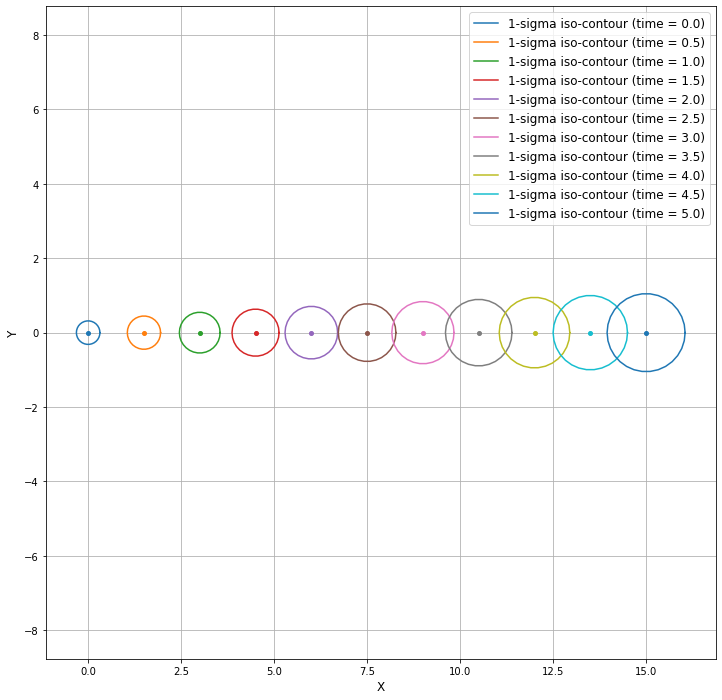

In [15]:
init_matrix = np.array([
    [1, 0],
    [0, 1]
])

mu_X = np.array([0, 0])
sigma_X = np.array([
    [0.1, 0],
    [0, 0.1]
])

mu_eta = np.array([0, 0])
sigma_eta = np.array([
    [0.1, 0],
    [0, 0.1]
])
u_t = np.array([3, 0])

dt = 0.5
n_t = 10
times = np.linspace(0, dt*n_t, n_t + 1) # dt = 0.5

new_mu, new_sigma = mu_X, sigma_X

plt.figure(figsize=(12,12))

for time in times[:-1]:
    plot2dcov(new_mu, new_sigma, 1, title=f'(time = {time})')
    new_mu, new_sigma = next_step(init_matrix=init_matrix, mu_X=new_mu, sigma_X=new_sigma, dt=dt, u_t=u_t, mu_eta=mu_eta, sigma_eta=sigma_eta)

plot2dcov(new_mu, new_sigma, 1, title=f'(time = {times[-1]})', show=True)


Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed:
$
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t}
=
\begin{bmatrix}
1 & 0.3 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v_x \\
v_y
\end{bmatrix}_{t}
+
\begin{bmatrix}
\eta_x \\
\eta_y
\end{bmatrix}_{t}
$

All the other parameters and controls are the
same as defined earlier.

#### C)  Draw the propagation state PDF ($1-sigma$ iso-contour and $500$ particles) for times indexes t = 0, ... , 5.

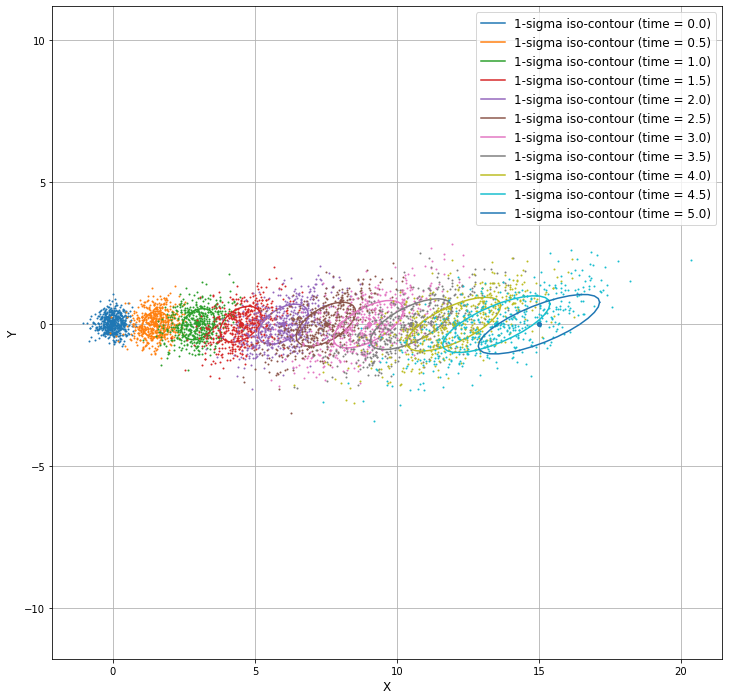

In [16]:
N = 500

init_matrix = np.array([
    [1, 0.3],
    [0, 1]
])

new_mu, new_sigma = mu_eta, sigma_eta

plt.figure(figsize=(12,12))

for time in times[:-1]:
    sample = np.random.multivariate_normal(new_mu, new_sigma, N).T
    plot2dcov(new_mu, new_sigma, 1, title=f'(time = {time})')
    plt.plot(sample[0], sample[1], 'o', color=plt.gca().lines[-1].get_color(), markersize=1)
    
    new_mu, new_sigma = next_step(init_matrix=init_matrix, mu_X=new_mu, sigma_X=new_sigma, dt=dt, u_t=u_t, mu_eta=mu_eta, sigma_eta=sigma_eta)
    
    
plot2dcov(new_mu, new_sigma, 1, title=f'(time = {times[-1]})', show=True)

Now, suppose that the robotic platform is non-holonomic, and the corresponding propagation model is:
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t}
=
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
cos(\theta)\Delta t & 0 \\
sin(\theta)\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v \\
w
\end{bmatrix}_{t}
+
\begin{bmatrix}
\eta_x \\
\eta_y \\
\eta_{\theta}
\end{bmatrix}_{t}
$
, being
$
\begin{bmatrix}
\eta_x \\
\eta_y \\
\eta_{\theta}
\end{bmatrix}_{t}
\sim
\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix},
\begin{bmatrix}
0.2 & 0   & 0 \\
0   & 0.2 & 0 \\
0   & 0   & 0.1
\end{bmatrix}
\end{pmatrix}
$
and the PDF for the initial state
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{0}
\sim
\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix},
\begin{bmatrix}
0.1 & 0   & 0 \\
0   & 0.1 & 0 \\
0   & 0   & 0.5
\end{bmatrix}
\end{pmatrix}
$
#### D) Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the control $u_t = [3, 1.5]^T$ showing the propagated Gaussian by plotting the $1-sigma$ iso-contour. Hint: you can marginalize out $\theta$ and plot the corresponding $\Sigma_{(xy)}$ as explained in class.


Hint. In practice you can forget about noise terms while linearising.

In this case we have continious-time model, so in 
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t} 
= 
g(X_{t-1}, u_t, \epsilon_t) = g(\mu_{t-1}, u_t) + G_t(X_{t-1} - \mu_{t-1}) + \epsilon_t$,  $G_t$ matrix should be calculated as Jacobian:

$
f_1(x, y, \theta) = x + \cos(\theta) \Delta t v \\
f_2(x, y, \theta) = y + \sin(\theta) \Delta t v \\
f_3(x, y, \theta) = \theta + \Delta t w
$

$
G_t = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} & \frac{\partial f_1}{\partial \theta} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} & \frac{\partial f_2}{\partial \theta} \\
\frac{\partial f_3}{\partial x} & \frac{\partial f_3}{\partial y} & \frac{\partial f_3}{\partial \theta}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & -\sin(\theta)\Delta t v \\
0 & 1 & \cos(\theta)\Delta t v \\
0 & 0 & 1
\end{bmatrix}
$

After that we can define 
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t}
$ as follow:

$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t}
\sim
\mathcal{N}(g(\mu_{t-1}, u_t), G_t \Sigma_{t-1} G_t^T + \Sigma_{\eta})
$

In [17]:
# For drawing test paths
def test_path_state(mu_X, sigma_X, mu_eta, sigma_eta, dt, u_t, n, N=100):
    
    A = np.eye(mu_X.shape[0])
    def B(theta):
        B = np.array([
            [np.cos(theta) * dt, 0],
            [np.sin(theta) * dt, 0],
            [0, dt]
        ])
        return B
        
    for i in range(N):
        X = np.zeros((3, n+1))

        X[:, 0] = np.random.normal(mu_X, sigma_X) @ np.ones(3)
        for i in range(n):
            X[:, i + 1] = A @ X[:, i] + B(X[2, i]) @ u_t + np.random.normal(mu_eta, sigma_eta) @ np.ones(3)

        plt.plot(X[0], X[1], color='b', linewidth=1)

In [18]:
def next_step_not_linear_state(mu_X, sigma_X, dt, u_t, mu_eta, sigma_eta):
    
    A = np.eye(mu_X.shape[0])
    B = np.array([
        [np.cos(mu_X[2]) * dt, 0],
        [np.sin(mu_X[2]) * dt, 0],
        [0, dt]
    ])
    
    new_mu = A @ mu_X + B @ u_t
    
    #As we do not have changes in action space we need to calculate only G matrix
    G = np.array([
        [1, 0, -np.sin(mu_X[2]) * dt * u_t[0]],
        [0, 1, np.cos(mu_X[2]) * dt * u_t[0]],
        [0, 0, 1],
    ])
    
    new_sigma = G @ sigma_X @ G.T + sigma_eta

    return new_mu, new_sigma

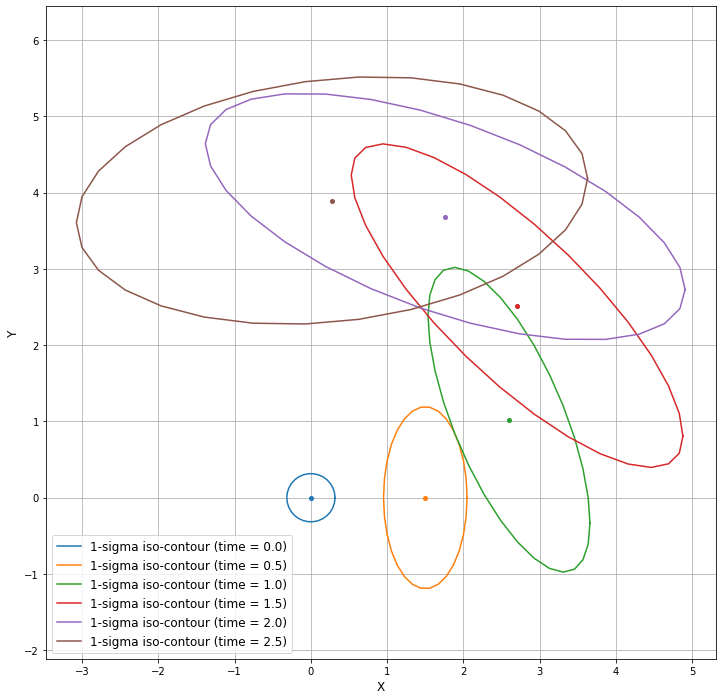

In [19]:
mu_X = np.array([0, 0, 0])
sigma_X = np.array([
    [0.1, 0, 0],
    [0, 0.1, 0],
    [0, 0, 0.5]
])

mu_eta_s = np.array([0, 0, 0])
sigma_eta_s = np.array([
    [0.2, 0, 0],
    [0, 0.2, 0],
    [0, 0, 0.1]
])
u_t = np.array([3, 1.5])

dt = 0.5
n_t = 5
times = np.linspace(0, dt*n_t, n_t + 1) # dt = 0.5

new_mu_s, new_sigma_s = mu_X, sigma_X

plt.figure(figsize=(12,12))

for time in times[:-1]:
    plot2dcov(new_mu_s[:-1], new_sigma_s[:-1, :-1], 1, title=f'(time = {time})')
    new_mu_s, new_sigma_s = next_step_not_linear_state(mu_X=new_mu_s, sigma_X=new_sigma_s, dt=dt, u_t=u_t, mu_eta=mu_eta_s, sigma_eta=sigma_eta_s)

if run_additional:
    test_path_state(mu_X, sigma_X, mu_eta_s, sigma_eta_s, dt, u_t, n_t)

plot2dcov(new_mu_s[:-1], new_sigma_s[:-1, :-1], 1, title=f'(time = {times[-1]})', show=True)

#### E) Repeat the same experiment as above, using the same control input $u_t$ and initial state estimate,
now considering that noise is expressed in the action space instead of state space:
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t}
=
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t-1}
+
\begin{bmatrix}
cos(\theta)\Delta t & 0 \\
sin(\theta)\Delta t & 0 \\
0 & \Delta t
\end{bmatrix}
\begin{bmatrix}
v + \eta_v\\
w + \eta_w
\end{bmatrix}_{t}
$
, being
$
\begin{bmatrix}
\eta_v \\
\eta_w
\end{bmatrix}_{t}
\sim
\mathcal{N}
\begin{pmatrix}
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
2 & 0 \\
0 & 0.1
\end{bmatrix}
\end{pmatrix}
$

In this case we have additional term in 
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t} 
$ 
:
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t} 
= 
g(X_{t-1}, u_t, \epsilon_t) = g(\mu_{t-1}, u_t) + G_t(X_{t-1} - \mu_{t-1}) + V_t \delta u
$,
$G_t$ matrix same as in task 3.D, and $V_t$ matrix should be also calculated as Jacobian:

$
f_1(x, y, \theta) = x + \cos(\theta) \Delta t v \\
f_2(x, y, \theta) = y + \sin(\theta) \Delta t v \\
f_3(x, y, \theta) = \theta + \Delta t w
$

$
V_t = 
\begin{bmatrix}
\frac{\partial f_1}{\partial v} & \frac{\partial f_1}{\partial w}  \\
\frac{\partial f_2}{\partial v} & \frac{\partial f_2}{\partial w}  \\
\frac{\partial f_3}{\partial v} & \frac{\partial f_3}{\partial w}
\end{bmatrix}
=
\begin{bmatrix}
\cos(\theta) \Delta t & 0 \\
\sin(\theta) \Delta t & 0 \\
0 & \Delta t 
\end{bmatrix}
$

After that we can define 
$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t} 
$ as follow:

$
\begin{bmatrix}
x \\
y \\
\theta
\end{bmatrix}_{t} 
\sim
\mathcal{N}(g(\mu_{t-1}, u_t), G_t \Sigma_{t-1} G_t^T + V_t \Sigma_{\eta} V_t^T)
$

In [20]:
# For drawing test paths
def test_path_action(mu_X, sigma_X, mu_eta, sigma_eta, dt, u_t, n, N=100):
    for i in range(N):
        
        X = np.zeros((3, n + 1))

        A = np.eye(mu_X.shape[0])
        def B(theta):
            B = np.array([
            [np.cos(theta) * dt, 0],
            [np.sin(theta) * dt, 0],
            [0, dt]
        ])
            return B

        X[:, 0] = np.random.normal(mu_X, sigma_X) @ np.ones(3)
        for i in range(n):
            X[:, i + 1] = A @ X[:, i] + B(X[2, i]) @ (u_t + np.random.normal(mu_eta, sigma_eta) @ np.ones(2))

        plt.plot(X[0], X[1], color='b', linewidth=1)

In [21]:
def next_step_not_linear_action(mu_X, sigma_X, dt, u_t, mu_eta, sigma_eta):
    
    A = np.eye(mu_X.shape[0])
    B = np.array([
        [np.cos(mu_X[2]) * dt, 0],
        [np.sin(mu_X[2]) * dt, 0],
        [0, dt]
    ])
    
    new_mu = A @ mu_X + B @ u_t
    
    #As we have changes in action space we need to calculate G and V matrices
    G = np.array([
        [1, 0, -np.sin(mu_X[2]) * dt * u_t[0]],
        [0, 1, np.cos(mu_X[2]) * dt * u_t[0]],
        [0, 0, 1],
    ])
    
    V = np.array([
        [np.cos(mu_X[2]) * dt, 0],
        [np.sin(mu_X[2]) * dt, 0],
        [0, dt],
    ])
    
    new_sigma = G @ sigma_X @ G.T + V @ sigma_eta @ V.T

    return new_mu, new_sigma

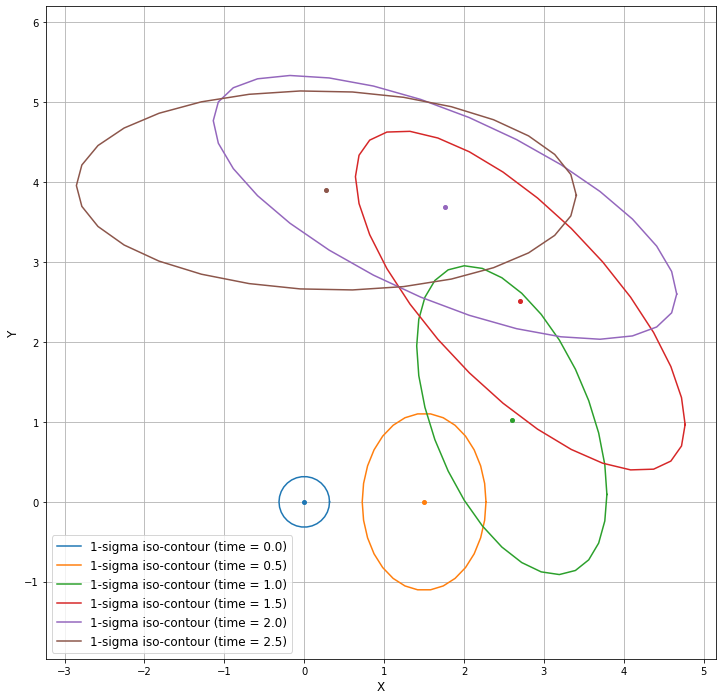

In [22]:
mu_eta_a = np.array([0, 0])
sigma_eta_a = np.array([
    [2, 0],
    [0, 0.1]
])

new_mu_a, new_sigma_a = mu_X, sigma_X

plt.figure(figsize=(12,12))

for time in times[:-1]:
    plot2dcov(new_mu_a[:-1], new_sigma_a[:-1, :-1], 1, title=f'(time = {time})')
    new_mu_a, new_sigma_a = next_step_not_linear_action(mu_X=new_mu_a, sigma_X=new_sigma_a, dt=dt, u_t=u_t, mu_eta=mu_eta_a, sigma_eta=sigma_eta_a)

if run_additional:
    test_path_action(mu_X, sigma_X, mu_eta_a, sigma_eta_a, dt, u_t, n_t, 100)
plot2dcov(new_mu_a[:-1], new_sigma_a[:-1, :-1], 1, title=f'(time = {times[-1]})', show=True)

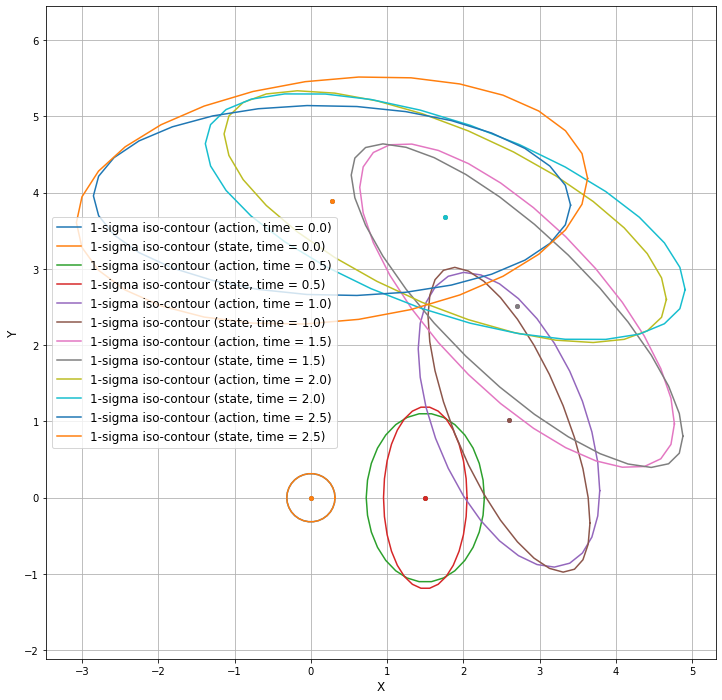

In [23]:

new_mu_a, new_sigma_a = mu_X, sigma_X
new_mu_s, new_sigma_s = mu_X, sigma_X

plt.figure(figsize=(12,12))

for time in times[:-1]:
    plot2dcov(new_mu_a[:-1], new_sigma_a[:-1, :-1], 1, title=f'(action, time = {time})')
    new_mu_a, new_sigma_a = next_step_not_linear_action(mu_X=new_mu_a, sigma_X=new_sigma_a, dt=dt, u_t=u_t, mu_eta=mu_eta_a, sigma_eta=sigma_eta_a)
    plot2dcov(new_mu_s[:-1], new_sigma_s[:-1, :-1], 1, title=f'(state, time = {time})')
    new_mu_s, new_sigma_s = next_step_not_linear_state(mu_X=new_mu_s, sigma_X=new_sigma_s, dt=dt, u_t=u_t, mu_eta=mu_eta_s, sigma_eta=sigma_eta_s)


plot2dcov(new_mu_a[:-1], new_sigma_a[:-1, :-1], 1, title=f'(action, time = {times[-1]})')
plot2dcov(new_mu_s[:-1], new_sigma_s[:-1, :-1], 1, title=f'(state, time = {times[-1]})', show=True)

    

##### Comment
In case of errors in action space our model less accurate (iso-contours are wider). This is because changes in velocities have a greater impact, for example, they can simply change the direction of movement of the robot (from forward to backward).